In [1]:
import networkx as nx
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [77]:
#################################################################################
############################### Helper Functions  ###############################
#################################################################################

def set_influence(G, value, node=None):
    '''
        Set influence of a node in a network G or
        set influence of all nodes to value.
        G      ::  a networkx graph
        node   ::  a reference to a node in G
        value  ::  an integer 0 or 1
    '''
    if node:
        G.nodes[node][label] = value
    else:
        influence_attrib = { i : 0 for i in range(N) }
        nx.set_node_attributes(G,influence_attrib, label)
        
def get_is_influenced(G, node):
    return G.nodes[node][label]
        
def get_number_influenced(G):
    '''
        Get the number of influenced nodes.
    '''
    return sum(nx.get_node_attributes(G, label).values())

def check_can_influence(G, node, q):
    '''
        Determines whether a node is influenced by
        its neighbours. (Threshold Check)
    '''
    if get_is_influenced(G, node) == 1:
        return False
    
    friends = list(G.neighbors(node))
    num_friends = len(friends)
    
    if num_friends == 0:
        return False
    
    num_influenced = sum([1 for friend in friends if G.nodes[friend][label] == 1])
    
    if num_influenced/num_friends > q:
        return True
    return False

In [83]:
#################################################################################
########################## Simulation Helper Functions ##########################
#################################################################################

def spread_influence(G, current_node, phi):
    '''
        Recursive function to spread influence 
        from current_node in G.
    '''
    
    ## Not interesting
    if get_is_influenced(G, current_node) == 0 and not check_can_influence(G, current_node, phi):
        return
    else:
        set_influence(G, 1, current_node)
        ## Find uninfluenced friends
        friends = list(G.neighbors(current_node))
        targets = [friend for friend in friends if G.nodes[friend][label] == 0]
        
        for friend in targets:
            spread_influence(G, friend, phi)
        
def get_vulnerable(G, phi):
    '''
        Check for vulnerable nodes.
        Return list of vulnerable nodes.
    '''
    vulnerable = []
    for node in G.nodes():
        if check_can_influence(G, node, phi):
            vulnerable.append(node)
    return vulnerable
        
def simulate_spread(G, nodes, phi):
    '''
        Simulates the spread of influence starting from each 
        node in nodes and returns a list containing the 
        number of influenced from starting at each node.
    '''
    S = []
    for node in nodes:
        G_tmp = G.copy()
        set_influence(G_tmp, 1, node)
        spread_influence(G_tmp, node, phi)
        
        vulnerable = get_vulnerable(G_tmp, phi)

        while len(vulnerable) != 0:
            for vul in vulnerable:
                spread_influence(G_tmp, vul, phi)
            vulnerable = get_vulnerable(G_tmp, phi)

        S.append(get_number_influenced(G_tmp))
        
    return S


In [79]:
S = []
nodes = influential_nodes
for node in nodes:
    G_tmp = G.copy()
    set_influence(G_tmp, 1, node)
    spread_influence(G_tmp, node, phi)

    vulnerable = get_vulnerable(G_tmp, phi)

    while len(vulnerable) != 0:
        for vul in vulnerable:
            spread_influence(G_tmp, vul, phi)
        vulnerable = get_vulnerable(G_tmp, phi)
        print(vulnerable)

    S.append(get_number_influenced(G_tmp))

Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence
Can Influence


In [72]:
check_can_influence(G_tmp, 2, phi)

True

In [74]:
spread_influence(G_tmp, 2, phi)

Can Influence


In [76]:
G_tmp.nodes[2]

{'is_influenced': 1}

In [64]:
#################################################################################
######################## Simulation Setup and Parameters ########################
#################################################################################

label = 'is_influenced'
## Top q% of influence (degree) distribution are classified as influential
q = 0.1   
## Threshold 
phi = 0.18

In [ ]:
'''
    Test Run
'''
## Random Graph and Parameters
N = 100
p = 0.0015
G = nx.erdos_renyi_graph(N, p, seed=2020)

G_tmp = G.copy()
## Setup influence attribute
set_influence(G, 0)
## Retrieve influential nodes - top q% and non-influential nodes
degree_ordered_nodes = sorted(list(G.nodes()), key=lambda x: G.degree(x), reverse=True)
influential_nodes = degree_ordered_nodes[:int(q*N)]
normie_nodes = degree_ordered_nodes[int(q*N):]
## Compute Results
S_influenced = simulate_spread(G, influential_nodes, phi)
S_normie = simulate_spread(G, normie_nodes, phi)

In [111]:
#################################################################################
################################## Simulation ###################################
#################################################################################

N = 100
phi = 0.001
max_n_avg = 6
increment = 0.2

n_avg = np.arange(1, max_n_avg, increment)
p = [avg/(N-1) for avg in n_avg]
n = len(p)
S_influential, S_normal = [0] * p, [0] * p

for i in tqdm(range(n), miniters=int9increment*n):
    probability = p[i]
    G = nx.erdos_renyi_graph(N, probability)
    set_influence(G, 0)
    ## Retrieve influential nodes - top q% and non-influential nodes
    degree_ordered_nodes = sorted(list(G.nodes()), key=lambda x: G.degree(x), reverse=True)
    influential_nodes = degree_ordered_nodes[:int(q*N)]
    normal_nodes = degree_ordered_nodes[int(q*N):]
    ## Simulation
    influential = simulate_spread(G, influential_nodes, phi)
    normal = simulate_spread(G, normal_nodes, phi)
    ## Store results
    S_influential[i] += np.mean(influential)
    S_normal[i] += (np.mean(normal))
    

TypeError: can't multiply sequence by non-int of type 'list'

In [108]:
############
### Pots ###
############
names = ["Influential", "Normal"]

P_influential = [x/N for x in S_influential]
P_normal = [x/N for x in S_normal]

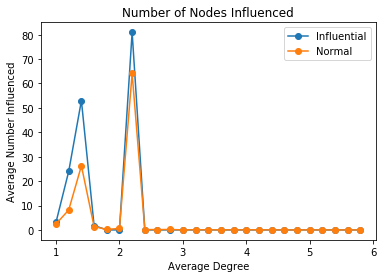

In [109]:
plt.plot(n_avg, S_influential, "-o")
plt.plot(n_avg, S_normal, "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Number of Nodes Influenced")
plt.legend(names)

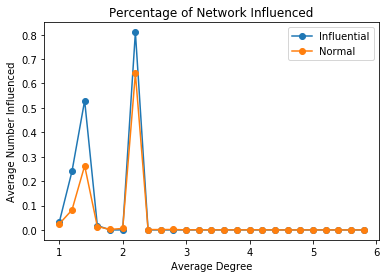

In [110]:
plt.plot(n_avg, P_influential, "-o")
plt.plot(n_avg, P_normal, "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Percentage of Network Influenced")
plt.legend(names)

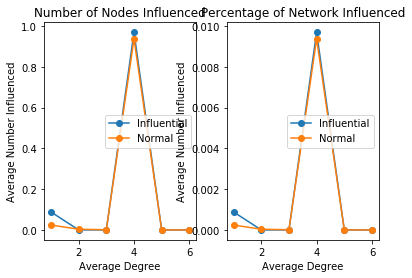

In [102]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(n_avg, S_influential, "-o")
axs[0].plot(n_avg, S_normal, "-o")
axs[0].set_title("Number of Nodes Influenced")
axs[0].set_ylabel("Average Number Influenced")
axs[0].set_xlabel("Average Degree")
axs[0].legend(names)

axs[1].plot(n_avg, P_influential, "-o")
axs[1].plot(n_avg, P_normal, "-o")
axs[1].set_title("Percentage of Network Influenced")
axs[1].set_ylabel("Average Number Influenced")
axs[1].set_xlabel("Average Degree")
axs[1].legend(names)